## Montar las carpetas de google drive.

# Create environment in Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Move to google drive environment
%cd /content/drive/MyDrive/TFM Comparativa Soluciones

/content/drive/MyDrive/TFM Comparativa Soluciones


# Load data from Kaggle

In [ ]:
#! pip install -q kaggle

In [ ]:
#! mkdir ~/.kaggle

In [ ]:
#! cp kaggle.json ~/.kaggle/

In [ ]:
#! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#! kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                        2022 Ukraine Russia War                              2KB  2022-04-01 09:19:10           4158        266  1.0              
datasets/prasertk/healthy-lifestyle-cities-report-2021           Healthy Lifestyle Cities Report 2021                 2KB  2022-03-03 00:26:02           3601        105  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease    Personal Key Indicators of Heart Disease             3MB  2022-02-16 10:18:03           6707        145  1.0              
datasets/vivek468/superstore-dataset-final                  

In [ ]:
#%cd TFM Comparativa Soluciones

/content/drive/MyDrive/TFM Comparativa Soluciones


In [ ]:
#!kaggle datasets download -d cdeotte/jpeg-melanoma-256x256

 99% 785M/791M [00:05<00:00, 140MB/s]
100% 791M/791M [00:05<00:00, 141MB/s]


In [ ]:
#!unzip jpeg-melanoma-256x256.zip

In [ ]:
#%cd '/content/drive/MyDrive/TFM Comparativa Soluciones'

/content/drive/MyDrive/TFM Comparativa Soluciones


In [ ]:
%ls

jpeg-melanoma-256x256.zip                       test/     train.csv
multimodal-melanoma-model-with-conf-matrix.log  test.csv
sample_submission.csv                           train/


## Cargar librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
##import matplotlib as plt
import matplotlib.pyplot as plt
import random
import plotly.express as px
import cv2

In [ ]:
PATH_to_images_train = '/train'
PATH_to_dataframes_train = 'melanoma/train.csv'
PATH_to_dataframes_val = 'melanoma/val.csv'

### Obtención de los cvs que viene por defecto en el reto. Son los que tengo que juntar y posteriormente dividir para obtener mis conjuntos de entrenamiento, test y validación.

In [ ]:
df_train = pd.read_csv(PATH_to_dataframes_train)
df_val = pd.read_csv(PATH_to_dataframes_train)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2701 entries, 0 to 2700
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  2701 non-null   object
 1   patient_id  2701 non-null   object
 2   features    2701 non-null   object
 3   target      2701 non-null   int64 
 4   augmented   2701 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 105.6+ KB


In [ ]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2701 entries, 0 to 2700
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  2701 non-null   object
 1   patient_id  2701 non-null   object
 2   features    2701 non-null   object
 3   target      2701 non-null   int64 
 4   augmented   2701 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 105.6+ KB


In [ ]:
#Concatenos los dataframes de validación y entrenamiento para tener el conjunto de datos entero
#y posteriormente dividirlo en train, test, validation.
df = pd.concat([df_val, df_train])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5402 entries, 0 to 2700
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  5402 non-null   object
 1   patient_id  5402 non-null   object
 2   features    5402 non-null   object
 3   target      5402 non-null   int64 
 4   augmented   5402 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 253.2+ KB


In [ ]:
print("Número de imágenes proporcionadas: " + str(len(df)))

Número de imágenes proporcionadas: 5402


In [ ]:
used_features =[
    "image_name",
    "patient_id",
    "features",
    "target",
    "augmented"
]
df = df.drop_duplicates(used_features)

In [ ]:
print("Número de imágenes proporcionadas: " + str(len(df)))

Número de imágenes proporcionadas: 2701


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 0 to 2700
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  2701 non-null   object
 1   patient_id  2701 non-null   object
 2   features    2701 non-null   object
 3   target      2701 non-null   int64 
 4   augmented   2701 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 126.6+ KB


#### Obtengo todos los datos del conjunto de imágenes total. Para poder hacer el análisis exploratorio.

In [ ]:
df_train_raw = pd.read_csv("train.csv")
#df_test_raw = pd.read_csv("test.csv")

In [ ]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
 8   tfrecord                       33126 non-null  int64  
 9   width                          33126 non-null  int64  
 10  height                         33126 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 2.8+ MB


In [ ]:
#Se mergean los dos dataframes
#Conjunto de datos raw y conjunto de datos proporcionados por el reto
#Para poder hacer el análisis exploratorio de los datos.
df_merge = df.merge(df_train_raw, on=['image_name','patient_id','target'], how='left')

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 0 to 2700
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     2701 non-null   object 
 1   patient_id                     2701 non-null   object 
 2   features                       2701 non-null   object 
 3   target                         2701 non-null   int64  
 4   augmented                      2701 non-null   int64  
 5   sex                            2701 non-null   object 
 6   age_approx                     2701 non-null   float64
 7   anatom_site_general_challenge  2654 non-null   object 
 8   diagnosis                      2701 non-null   object 
 9   benign_malignant               2701 non-null   object 
 10  tfrecord                       2701 non-null   int64  
 11  width                          2701 non-null   int64  
 12  height                         2701 non-null   i

### 1. Análisis de la distribución de imágenes por sexo

In [ ]:
df_merge.sex.value_counts(normalize = True)

male      0.581266
female    0.418734
Name: sex, dtype: float64

In [ ]:
fig = px.histogram(df_merge, x="sex",
                   hover_data=df_merge.columns)
fig.update_layout(title_text='Count of male/female')
fig.show()

### 2. Análisis de la distribución de imágenes por edad

In [ ]:
df_merge.age_approx.value_counts(normalize = True)

55.0    0.119215
50.0    0.117364
45.0    0.106997
60.0    0.102925
65.0    0.087005
40.0    0.082562
70.0    0.078489
75.0    0.064421
35.0    0.064050
30.0    0.055535
80.0    0.037394
25.0    0.037023
20.0    0.018882
90.0    0.014809
85.0    0.010737
15.0    0.002592
Name: age_approx, dtype: float64

In [ ]:
fig = px.histogram(df_merge, x="age_approx",
                   hover_data=df_merge.columns)
fig.update_layout(title_text='Count of age')
fig.show()

### Análisis de la distribución de datos por lugar del cuerpo donde se encuentra la lesión.

In [ ]:
df_merge.anatom_site_general_challenge.value_counts(normalize = True)

torso              0.480030
lower extremity    0.243029
upper extremity    0.166918
head/neck          0.092690
palms/soles        0.012434
oral/genital       0.004898
Name: anatom_site_general_challenge, dtype: float64

In [ ]:
fig = px.histogram(df_merge, x="anatom_site_general_challenge",
                   hover_data=df_merge.columns)
fig.update_layout(title_text='Anatom sites')
fig.show()

### Análisis por diagnóstico

In [ ]:
df_merge.diagnosis.value_counts(normalize = True)

melanoma                0.486486
unknown                 0.425028
nevus                   0.085524
lentigo NOS             0.001481
seborrheic keratosis    0.000740
lichenoid keratosis     0.000370
solar lentigo           0.000370
Name: diagnosis, dtype: float64

In [ ]:
fig = px.histogram(df_merge, x="diagnosis",
                   hover_data=df_merge.columns)
fig.update_layout(title_text='Count of diagnosis')
fig.show()

### Análisis del valor a predecir, benigno/maligno

In [ ]:
df_merge.benign_malignant.value_counts(normalize = True)

benign       0.513514
malignant    0.486486
Name: benign_malignant, dtype: float64

In [ ]:
fig = px.histogram(df_merge, x="benign_malignant",
                   hover_data=df_merge.columns)
fig.update_layout(title_text='Count of benign/malignant')
fig.show()

### Visualización de imágenes de melanoma y no melanoma

In [ ]:
df_no_melanoma = df_merge[df_merge['target']==0]
df_melanoma = df_merge[df_merge['target']==1]

In [ ]:
def display_image(df):
    
    random_sampling = [random.randint(0, len(df)) for i in range(9)]
    image_indexes = [list(df.index)[random_sampling[i]] for i in range(len(random_sampling))]
    
    i = 0
    
    # plot first few images
    plt.figure(figsize=(12,12))
    for index in image_indexes:

        # Get corresponding label
        image_name = df.loc[index, 'image_name']
        site = df.loc[index, "anatom_site_general_challenge"]
        benign_malignant = df.loc[index, "benign_malignant"] 
        diagnosis = df.loc[index, "diagnosis"]        
        
        # define subplot
        plt.subplot(330 + 1 + i)
        plt.title('Melanoma: %s \n'%benign_malignant+\
                  'Diagnóstico: %s \n'%diagnosis+\
                  'Lugar: %s\n'%site,
                  fontsize=18)
        
        # plot raw pixel data
        numpy_image = cv2.imread("train/" + image_name + ".jpg")
        plt.imshow(cv2.cvtColor(numpy_image, cv2.COLOR_BGR2RGB))
        i+=1
        
    plt.subplots_adjust(bottom = 0.001)  # the bottom of the subplots of the figure
    plt.subplots_adjust(top = 0.99)
    # show the figure
    plt.show()

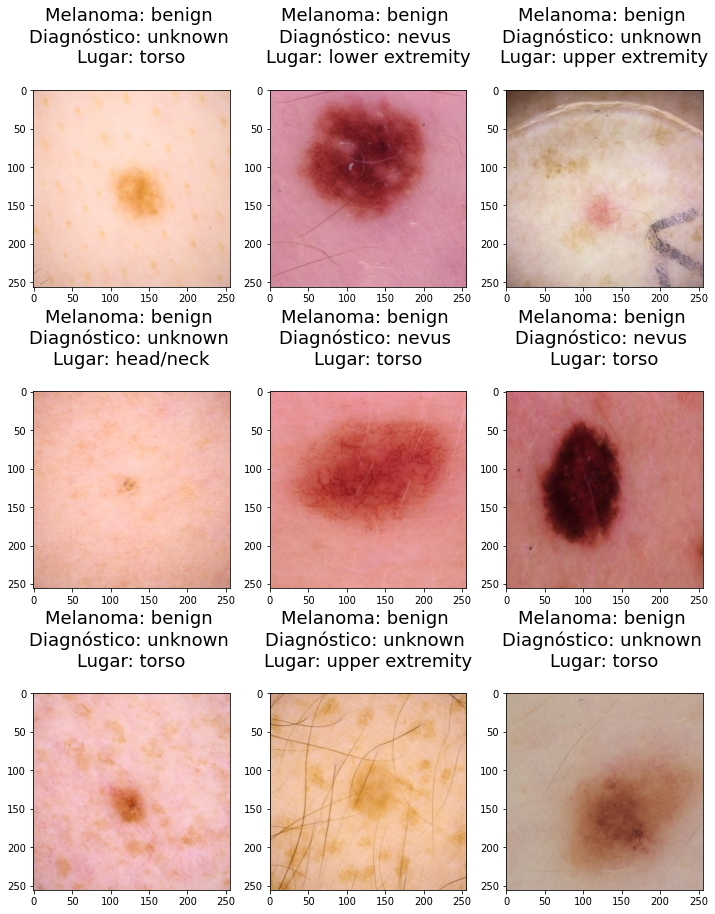

In [ ]:
display_image(df_no_melanoma)

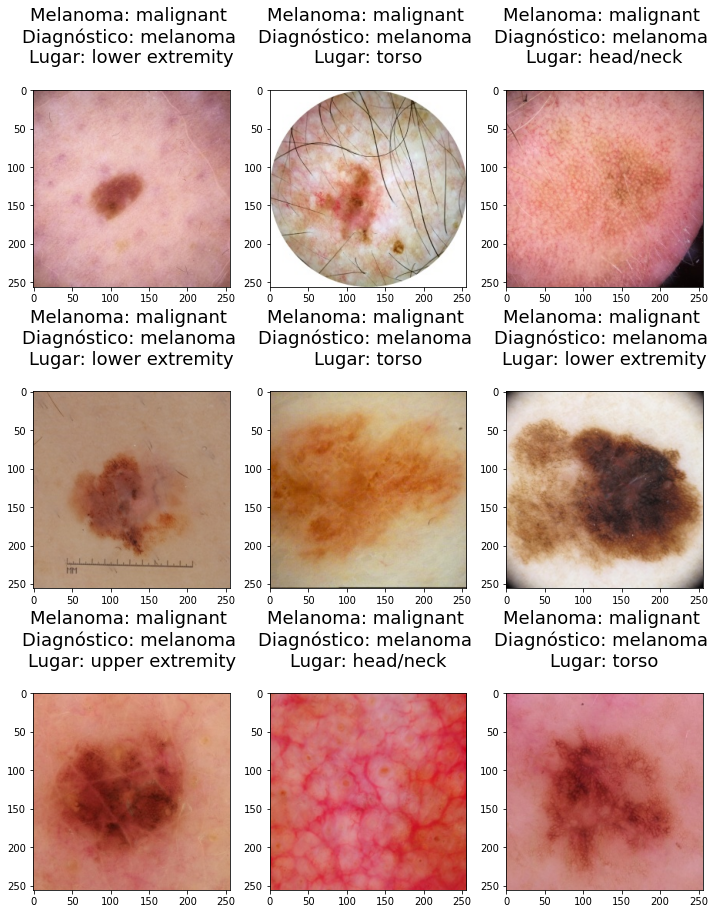

In [ ]:
display_image(df_melanoma)

In [ ]:
# %matplotlib inline
# for i in range(10):
#     plt.subplot(2,5, i+1)
#     plt.imshow(transforms.ToPILImage()(test_dataset[i][0]))
    
# plt.show()

In [ ]:
print(len(df_melanoma))
print(len(df_no_melanoma))

1314
1387


### Separación del conjunto de datos en entrenamiento 50%, validación 20% y test 20%.

In [ ]:
from sklearn.model_selection import train_test_split
#Se usa el Stratify para indicar que queremos tener un porcentaje parecido del valor que queremos predecir dentro de cada conjunto de datos generado.
#Se divide el conjunto de datos en el 80% datos de entrenamiento y 20% datos de test
train, test = train_test_split(df, test_size = 0.20, stratify=df.target)
#Se vuelve a realizar una división para coger el 80% de los datos de entrenamiento y el 60% de los datos de test
train, val = train_test_split(train, test_size = 0.20, stratify=train.target)


In [ ]:
print(str(len(train[train['target']==0])))
print(str(len(train[train['target']==1])))
print(str(len(val[val['target']==0])))
print(str(len(val[val['target']==1])))
print(str(len(test[test['target']==0])))
print(str(len(test[test['target']==1])))


887
841
222
210
278
263


In [ ]:
# val.to_csv("melanoma_separated/val.csv", index=False)
# train.to_csv("melanoma_separated/train.csv", index=False)
# test.to_csv("melanoma_separated/test.csv", index=False)

In [ ]:
val.to_csv("melanoma_without_duplicates_separated/val.csv", index=False)
train.to_csv("melanoma_without_duplicates_separated/train.csv", index=False)
test.to_csv("melanoma_without_duplicates_separated/test.csv", index=False)

### Separación del conjunto de datos en entrenamiento 50%, validación 50% y test 20%.

In [ ]:
from sklearn.model_selection import train_test_split
#Se usa el Stratify para indicar que queremos tener un porcentaje parecido del valor que queremos predecir dentro de cada conjunto de datos generado.
#Se divide el conjunto de datos en el 80% datos de entrenamiento y 20% datos de test
train, test = train_test_split(df, test_size = 0.20, stratify=df.target)
#Se vuelve a realizar una división para coger el 80% de los datos de entrenamiento y el 60% de los datos de test
train, val = train_test_split(train, test_size = 0.50, stratify=train.target)

In [ ]:
print(str(len(train[train['target']==0])))
print(str(len(train[train['target']==1])))
print(str(len(val[val['target']==0])))
print(str(len(val[val['target']==1])))
print(str(len(test[test['target']==0])))
print(str(len(test[test['target']==1])))

554
526
555
525
278
263


In [ ]:
val.to_csv("melanoma_without_duplicates_separated_50/val.csv", index=False)
train.to_csv("melanoma_without_duplicates_separated_50/train.csv", index=False)
test.to_csv("melanoma_without_duplicates_separated_50/test.csv", index=False)